<a href="https://colab.research.google.com/github/NavaponS/Market-Basket-Analysis-using-Association-Rule-Mining/blob/main/Market_Basket_Analysis_using_Association_Rule_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA 1 Market Basket Analysis Data**

## **Read Data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Project/AprioriFpGrowth/Data/basket_analysis.csv')
df

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


## **Prepare data**

> Drop Unnamed: 0

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


> Plot bar chart เช็คว่าในตารางมีแค่ True กับ False หรือไม่

<ipython-input-5-35cf8bd6f83d>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  item_counts = df.apply(pd.value_counts).sum(axis=1)


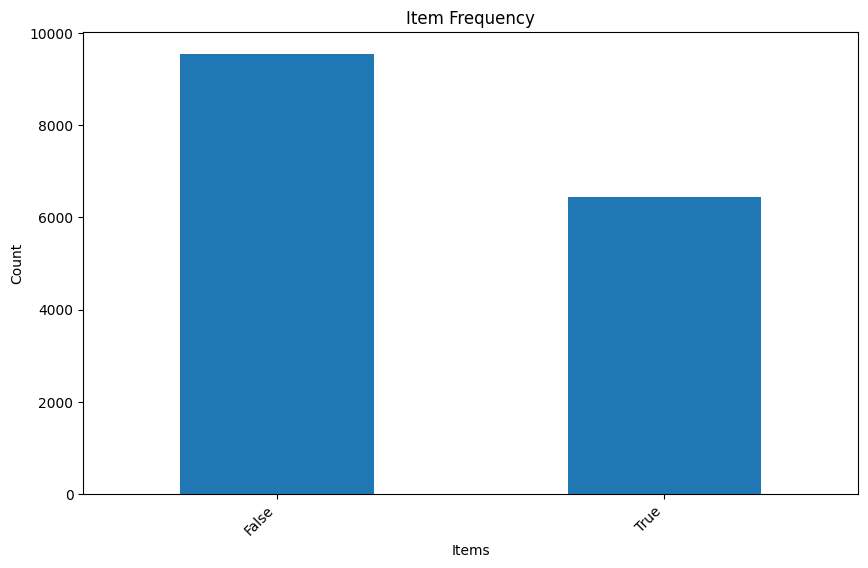

In [ ]:
import matplotlib.pyplot as plt

item_counts = df.apply(pd.value_counts).sum(axis=1)
plt.figure(figsize=(10, 6))
item_counts.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Item Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 15.7 KB


## **Model**

* Apriori
* FP-Growth

In [ ]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import time
import tracemalloc
import numpy as np
import pandas as pd

min_supports = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
confidence_range = np.arange(0.1, 1.1, 0.1)
n_runs = 5
results = []

def run_algorithm(algorithm, df, min_support, confidence_threshold):
    tracemalloc.start()
    start_time = time.time()
    frequent_itemsets = algorithm(df, min_support=min_support, use_colnames=True)
    if frequent_itemsets.empty:
        return 0,0,0
    num_itemsets = frequent_itemsets['itemsets'].apply(len).max()
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold, num_itemsets=num_itemsets)
    elapsed_time = time.time() - start_time
    current_memory, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return elapsed_time, peak_memory / 10**6, len(rules)

df_onehot = pd.get_dummies(df)

for min_support in min_supports:
    for confidence_threshold in confidence_range:
        apriori_times, apriori_memories, apriori_rule_counts = [], [], []
        fpgrowth_times, fpgrowth_memories, fpgrowth_rule_counts = [], [], []

        for _ in range(n_runs):
            elapsed_time, memory_used, rule_count = run_algorithm(apriori, df_onehot, min_support, confidence_threshold)
            if elapsed_time is not None:
                apriori_times.append(elapsed_time)
                apriori_memories.append(memory_used)
                apriori_rule_counts.append(rule_count)

            elapsed_time, memory_used, rule_count = run_algorithm(fpgrowth, df_onehot, min_support, confidence_threshold)
            if elapsed_time is not None:
                fpgrowth_times.append(elapsed_time)
                fpgrowth_memories.append(memory_used)
                fpgrowth_rule_counts.append(rule_count)

        if apriori_rule_counts or fpgrowth_rule_counts:
            results.append({
            "min_support": min_support,
            "confidence_threshold": round(confidence_threshold, 1),
            "apriori_avg_time": round(np.mean(apriori_times), 3) if apriori_times else 0,
            "apriori_avg_memory": round(np.mean(apriori_memories), 3) if apriori_memories else 0,
            "apriori_rule_count": int(np.mean(apriori_rule_counts)) if apriori_rule_counts else 0,
            "fpgrowth_avg_time": round(np.mean(fpgrowth_times), 3) if fpgrowth_times else 0,
            "fpgrowth_avg_memory": round(np.mean(fpgrowth_memories), 3) if fpgrowth_memories else 0,
            "fpgrowth_rule_count": int(np.mean(fpgrowth_rule_counts)) if fpgrowth_rule_counts else 0,
            })

result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by=["min_support", "confidence_threshold"]).reset_index(drop=True)

comparison_df_full = result_df[["min_support", "confidence_threshold", "apriori_avg_time", "apriori_avg_memory", "apriori_rule_count", "fpgrowth_avg_time", "fpgrowth_avg_memory", "fpgrowth_rule_count"]]
comparison_df_full.columns = ["Min Support", "Confidence Threshold", "Apriori Time (s)", "Apriori Memory (MB)", "Apriori Rule Count", "FP-Growth Time (s)", "FP-Growth Memory (MB)", "FP-Growth Rule Count"]

comparison_df_Rule = result_df[["min_support", "confidence_threshold", "apriori_rule_count", "fpgrowth_rule_count"]]
comparison_df_Rule.columns = ["Min Support", "Confidence Threshold", "Apriori Rule Count", "FP-Growth Rule Count"]
comparison_df_Rule

,Min Support,Confidence Threshold,Apriori Rule Count,FP-Growth Rule Count
0,0.1,0.1,438,438
1,0.1,0.2,438,438
2,0.1,0.3,339,339
3,0.1,0.4,337,337
4,0.1,0.5,97,97
...,...,...,...,...
95,1.0,0.6,0,0
96,1.0,0.7,0,0
97,1.0,0.8,0,0
98,1.0,0.9,0,0


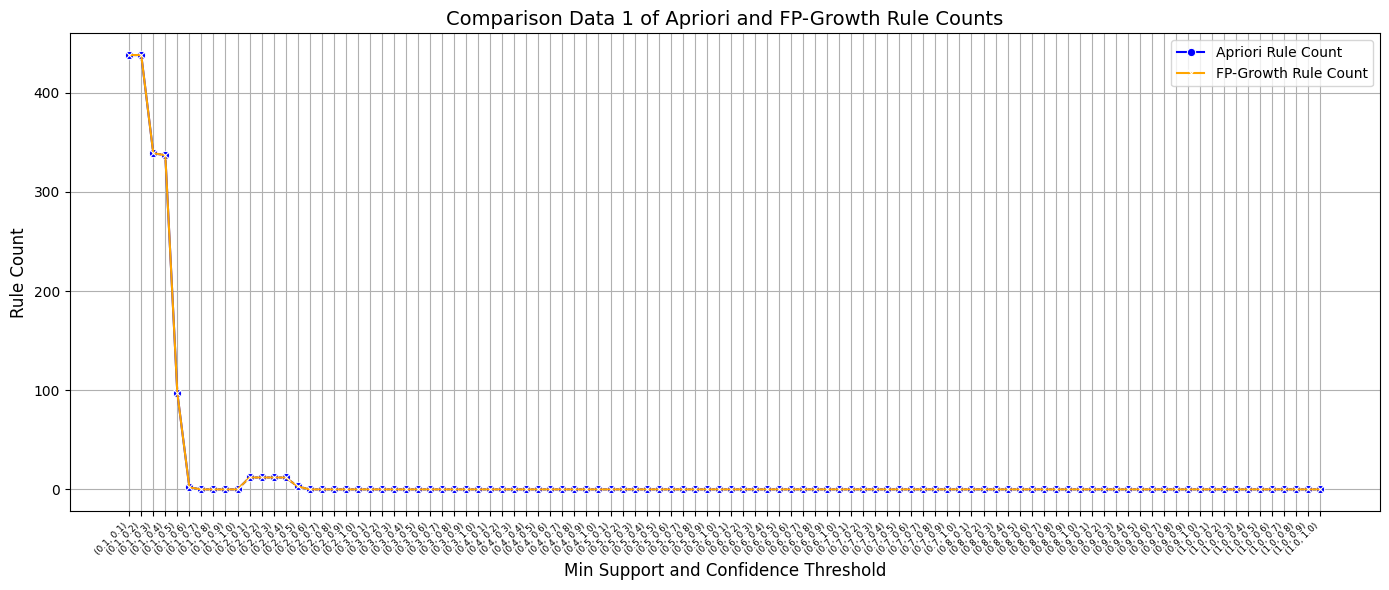

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df_full['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison_df_full.iterrows()]

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=comparison_df_full,
    x="Support-Confidence",
    y="Apriori Rule Count",
    marker="o",
    label="Apriori Rule Count",
    color="blue"
)

sns.lineplot(
    data=comparison_df_full,
    x="Support-Confidence",
    y="FP-Growth Rule Count",
    marker="x",
    label="FP-Growth Rule Count",
    color="orange"
)

plt.title("Comparison Data 1 of Apriori and FP-Growth Rule Counts", fontsize=14)
plt.xlabel("Min Support and Confidence Threshold", fontsize=12)
plt.ylabel("Rule Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=6.5)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

In [ ]:
comparison_df_Rule_non_zero = comparison_df_Rule[(comparison_df_Rule["Apriori Rule Count"] != 0) & (comparison_df_Rule["FP-Growth Rule Count"] != 0)]
comparison_df_Rule_non_zero

,Min Support,Confidence Threshold,Apriori Rule Count,FP-Growth Rule Count
0,0.1,0.1,438,438
1,0.1,0.2,438,438
2,0.1,0.3,339,339
3,0.1,0.4,337,337
4,0.1,0.5,97,97
5,0.1,0.6,2,2
10,0.2,0.1,12,12
11,0.2,0.2,12,12
12,0.2,0.3,12,12
13,0.2,0.4,12,12


In [ ]:
comparison_df_full_non_zero = comparison_df_full[(comparison_df_full["Apriori Rule Count"] != 0) & (comparison_df_full["FP-Growth Rule Count"] != 0)]
comparison_df_full_non_zero

,Min Support,Confidence Threshold,Apriori Time (s),Apriori Memory (MB),Apriori Rule Count,FP-Growth Time (s),FP-Growth Memory (MB),FP-Growth Rule Count,Support-Confidence
0,0.1,0.1,0.084,2.396,438,7.784,2.433,438,"(0.1, 0.1)"
1,0.1,0.2,0.072,2.395,438,6.116,2.328,438,"(0.1, 0.2)"
2,0.1,0.3,0.059,2.395,339,6.185,2.334,339,"(0.1, 0.3)"
3,0.1,0.4,0.062,2.395,337,6.284,2.334,337,"(0.1, 0.4)"
4,0.1,0.5,0.061,2.395,97,6.187,2.351,97,"(0.1, 0.5)"
5,0.1,0.6,0.046,2.395,2,6.062,2.462,2,"(0.1, 0.6)"
10,0.2,0.1,0.021,0.385,12,0.349,1.135,12,"(0.2, 0.1)"
11,0.2,0.2,0.021,0.385,12,0.318,1.136,12,"(0.2, 0.2)"
12,0.2,0.3,0.030,0.385,12,0.567,1.135,12,"(0.2, 0.3)"
13,0.2,0.4,0.027,0.385,12,0.373,1.136,12,"(0.2, 0.4)"


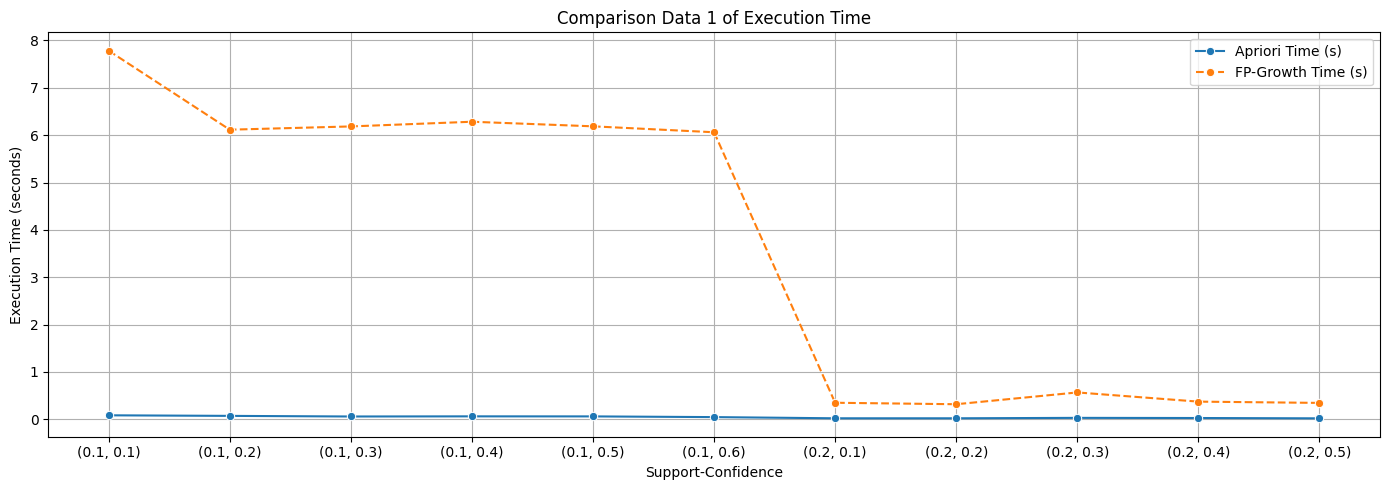

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Support-Confidence' not in comparison_df_full_non_zero.columns:
    comparison_df_full_non_zero['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison_df_full_non_zero.iterrows()]

plt.figure(figsize=(14, 5))
sns.lineplot(
    data=comparison_df_full_non_zero,
    x="Support-Confidence",
    y="Apriori Time (s)",
    marker='o',
    label="Apriori Time (s)",
    errorbar=('ci', False)
)
sns.lineplot(
    data=comparison_df_full_non_zero,
    x="Support-Confidence",
    y="FP-Growth Time (s)",
    marker='o',
    label="FP-Growth Time (s)",
    linestyle= "--",
    errorbar=('ci', False)
)
plt.title("Comparison Data 1 of Execution Time")
plt.xlabel("Support-Confidence")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

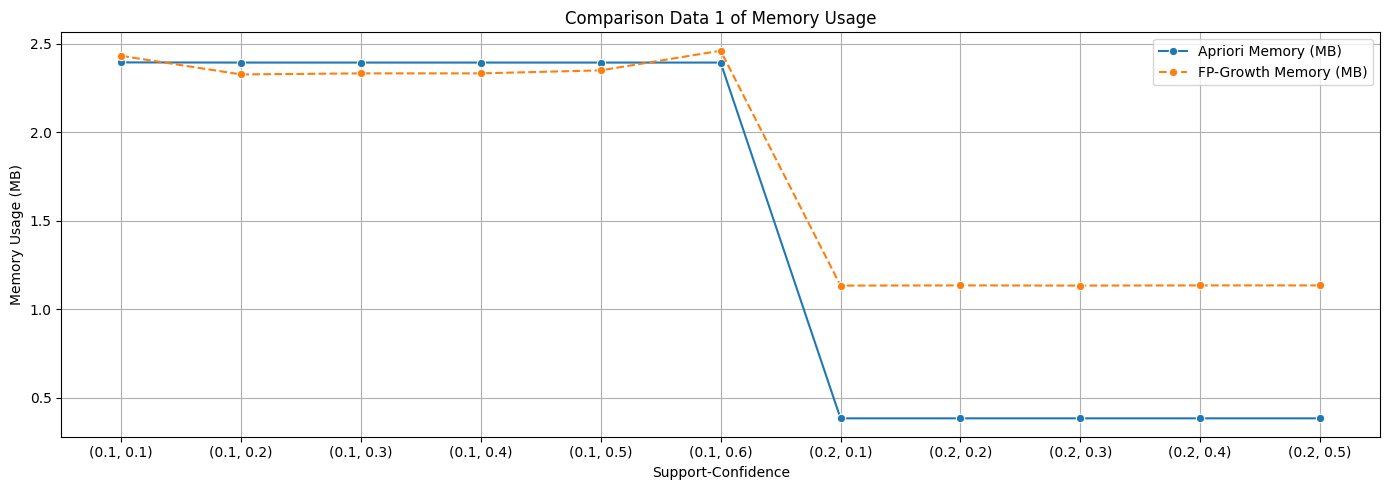

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Support-Confidence' not in comparison_df_full_non_zero.columns:
    comparison_df_full_non_zero['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison_df_full_non_zero.iterrows()]

plt.figure(figsize=(14, 5))
sns.lineplot(
    data=comparison_df_full_non_zero,
    x="Support-Confidence",
    y="Apriori Memory (MB)",
    marker='o',
    label="Apriori Memory (MB)",
    errorbar=('ci', False)
)
sns.lineplot(
    data=comparison_df_full_non_zero,
    x="Support-Confidence",
    y="FP-Growth Memory (MB)",
    marker='o',
    label="FP-Growth Memory (MB)",
    linestyle= "--",
    errorbar=('ci', False)
)
plt.title("Comparison Data 1 of Memory Usage")
plt.xlabel("Support-Confidence")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Apriori ดีกว่า 🤔

# **DATA 2 market baket analysis**


* Apriori
* FP-Growth

## **Read data**

In [ ]:
import csv
fileData = '/content/drive/MyDrive/Project/AprioriFpGrowth/Data/market basket analysis.csv'
with open(fileData) as f:
    reader = csv.reader(f)
    dataset = list(reader)
dataset[0:11]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate']]

## **Transform transaction into Matrix boolean**

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
df2

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **Model**

In [ ]:
import time
import tracemalloc
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import pandas as pd

min_support = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
confidence_range = np.arange(0.1, 1.1, 0.1)
n_runs = 5
results = []

def run_algorithm(algorithm, df2, min_support, confidence_threshold):
    tracemalloc.start()
    start_time = time.time()
    frequent_itemsets = algorithm(df2, min_support=min_support, use_colnames=True)

    if frequent_itemsets.empty:
        tracemalloc.stop()
        return 0, 0, 0
    num_itemsets = frequent_itemsets['itemsets'].apply(len).max()
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold, num_itemsets=num_itemsets)
    elapsed_time = time.time() - start_time
    _, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return elapsed_time, peak_memory / 10**6, len(rules)


df_onehot = pd.get_dummies(df2)


for min_support in min_support:
    for confidence_threshold in confidence_range:
        apriori_times, apriori_memories, apriori_rule_counts = [], [], []
        fpgrowth_times, fpgrowth_memories, fpgrowth_rule_counts = [], [], []

        for _ in range(n_runs):
            elapsed_time, memory_used, rule_count = run_algorithm(apriori, df_onehot, min_support, confidence_threshold)
            if elapsed_time is not None:
                apriori_times.append(elapsed_time)
                apriori_memories.append(memory_used)
                apriori_rule_counts.append(rule_count)

            elapsed_time, memory_used, rule_count = run_algorithm(fpgrowth, df_onehot, min_support, confidence_threshold)
            if elapsed_time is not None:
                fpgrowth_times.append(elapsed_time)
                fpgrowth_memories.append(memory_used)
                fpgrowth_rule_counts.append(rule_count)

        if apriori_rule_counts or fpgrowth_rule_counts:
            results.append({
            "min_support": min_support,
            "confidence_threshold": round(confidence_threshold, 1),
            "apriori_avg_time": round(np.mean(apriori_times), 3) if apriori_times else 0,
            "apriori_avg_memory": round(np.mean(apriori_memories), 3) if apriori_memories else 0,
            "apriori_rule_count": int(np.mean(apriori_rule_counts)) if apriori_rule_counts else 0,
            "fpgrowth_avg_time": round(np.mean(fpgrowth_times), 3) if fpgrowth_times else 0,
            "fpgrowth_avg_memory": round(np.mean(fpgrowth_memories), 3) if fpgrowth_memories else 0,
            "fpgrowth_rule_count": int(np.mean(fpgrowth_rule_counts)) if fpgrowth_rule_counts else 0,
            })


result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by=["min_support", "confidence_threshold"]).reset_index(drop=True)
comparison_df2 = result_df[["min_support", "confidence_threshold","apriori_avg_time", "apriori_avg_memory", "apriori_rule_count","fpgrowth_avg_time", "fpgrowth_avg_memory", "fpgrowth_rule_count"]]
comparison_df2.columns = ["Min Support", "Confidence Threshold","Apriori Time (s)", "Apriori Memory (MB)", "Apriori Rule Count","FP-Growth Time (s)", "FP-Growth Memory (MB)", "FP-Growth Rule Count"]
comparison_df2

,Min Support,Confidence Threshold,Apriori Time (s),Apriori Memory (MB),Apriori Rule Count,FP-Growth Time (s),FP-Growth Memory (MB),FP-Growth Rule Count
0,0.1,0.1,0.014,4.341,0,0.424,29.999,0
1,0.1,0.2,0.015,0.919,0,0.513,29.997,0
2,0.1,0.3,0.019,0.919,0,0.626,29.997,0
3,0.1,0.4,0.012,0.919,0,0.409,29.997,0
4,0.1,0.5,0.013,0.919,0,0.410,29.997,0
...,...,...,...,...,...,...,...,...
95,1.0,0.6,0.000,0.000,0,0.000,0.000,0
96,1.0,0.7,0.000,0.000,0,0.000,0.000,0
97,1.0,0.8,0.000,0.000,0,0.000,0.000,0
98,1.0,0.9,0.000,0.000,0,0.000,0.000,0


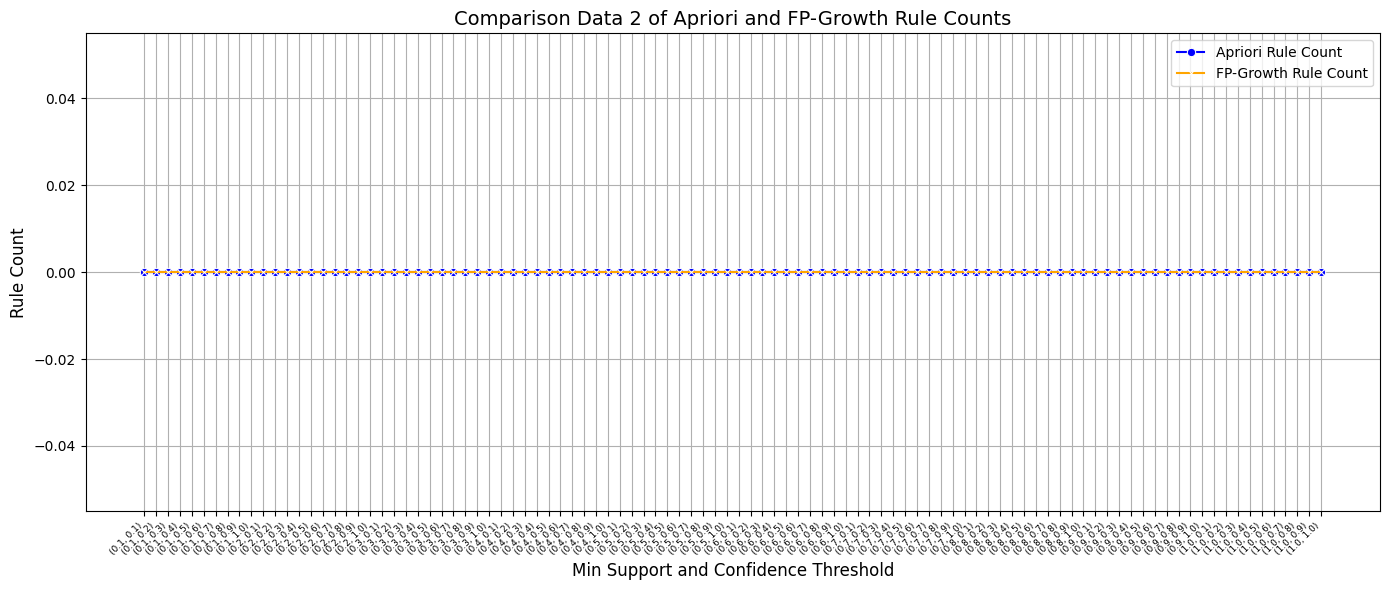

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison_df2['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison_df2.iterrows()]

plt.figure(figsize=(14, 6))

sns.lineplot(
    data=comparison_df2,
    x="Support-Confidence",
    y="Apriori Rule Count",
    marker="o",
    label="Apriori Rule Count",
    color="blue"
)

sns.lineplot(
    data=comparison_df2,
    x="Support-Confidence",
    y="FP-Growth Rule Count",
    marker="x",
    label="FP-Growth Rule Count",
    color="orange"
)

plt.title("Comparison Data 2 of Apriori and FP-Growth Rule Counts", fontsize=14)
plt.xlabel("Min Support and Confidence Threshold", fontsize=12)
plt.ylabel("Rule Count", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=6.5)

plt.tight_layout()

plt.legend()
plt.grid()
plt.show()

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
testfindruledf2 = apriori(df2, min_support=0.07, use_colnames=True)
testrule2 = association_rules(testfindruledf2 , metric="confidence", min_threshold=0.1)
test_rule2 = testrule2.sort_values('support', ascending=False)
test_ruledf2 = test_rule2.reset_index(drop=True)
test_ruledf2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.2,0.123228,0.339817
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.2,0.176286,0.339817


In [ ]:
import time
import tracemalloc
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import pandas as pd

min_support = [0.01,0.02,0.03,0.04,0.05,0.06,0.07]
confidence_range = np.arange(0.1, 1.1, 0.1)
n_runs = 5
results = []

def run_algorithm(algorithm, df2, min_support, confidence_threshold):
    tracemalloc.start()
    start_time = time.time()
    frequent_itemsets = algorithm(df2, min_support=min_support, use_colnames=True)

    if frequent_itemsets.empty:
        tracemalloc.stop()
        return 0, 0, 0
    num_itemsets = frequent_itemsets['itemsets'].apply(len).max()
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold, num_itemsets=num_itemsets)
    elapsed_time = time.time() - start_time
    current_memory, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return elapsed_time, peak_memory / 10**6, len(rules)

df_onehot = pd.get_dummies(df2)

for min_support in min_support:
    for confidence_threshold in confidence_range:
        apriori_times, apriori_memories, apriori_rule_counts = [], [], []
        fpgrowth_times, fpgrowth_memories, fpgrowth_rule_counts = [], [], []

        for _ in range(n_runs):
            elapsed_time, memory_used, rule_count = run_algorithm(apriori, df_onehot, min_support, confidence_threshold)
            if elapsed_time is not None:
                apriori_times.append(elapsed_time)
                apriori_memories.append(memory_used)
                apriori_rule_counts.append(rule_count)

            elapsed_time, memory_used, rule_count = run_algorithm(fpgrowth, df_onehot, min_support, confidence_threshold)
            if elapsed_time is not None:
                fpgrowth_times.append(elapsed_time)
                fpgrowth_memories.append(memory_used)
                fpgrowth_rule_counts.append(rule_count)

        if apriori_rule_counts or fpgrowth_rule_counts:
            results.append({
            "min_support": min_support,
            "confidence_threshold": round(confidence_threshold, 1),
            "apriori_avg_time": round(np.mean(apriori_times), 3) if apriori_times else 0,
            "apriori_avg_memory": round(np.mean(apriori_memories), 3) if apriori_memories else 0,
            "apriori_rule_count": int(np.mean(apriori_rule_counts)) if apriori_rule_counts else 0,
            "fpgrowth_avg_time": round(np.mean(fpgrowth_times), 3) if fpgrowth_times else 0,
            "fpgrowth_avg_memory": round(np.mean(fpgrowth_memories), 3) if fpgrowth_memories else 0,
            "fpgrowth_rule_count": int(np.mean(fpgrowth_rule_counts)) if fpgrowth_rule_counts else 0,
            })

result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by=["min_support", "confidence_threshold"]).reset_index(drop=True)
comparison_df2 = result_df[["min_support", "confidence_threshold","apriori_avg_time", "apriori_avg_memory", "apriori_rule_count","fpgrowth_avg_time", "fpgrowth_avg_memory", "fpgrowth_rule_count"]]
comparison_df2.columns = ["Min Support", "Confidence Threshold","Apriori Time (s)", "Apriori Memory (MB)", "Apriori Rule Count","FP-Growth Time (s)", "FP-Growth Memory (MB)", "FP-Growth Rule Count"]
comparison_df2

,Min Support,Confidence Threshold,Apriori Time (s),Apriori Memory (MB),Apriori Rule Count,FP-Growth Time (s),FP-Growth Memory (MB),FP-Growth Rule Count
0,0.01,0.1,0.262,113.101,460,94.970,29.998,460
1,0.01,0.2,0.228,113.100,234,96.197,29.998,234
2,0.01,0.3,0.202,113.100,125,94.002,29.998,125
3,0.01,0.4,0.249,113.100,62,95.989,29.998,62
4,0.01,0.5,0.216,113.100,15,94.070,29.998,15
...,...,...,...,...,...,...,...,...
65,0.07,0.6,0.023,4.610,0,1.136,29.997,0
66,0.07,0.7,0.018,4.610,0,0.791,29.997,0
67,0.07,0.8,0.017,4.610,0,0.785,29.997,0
68,0.07,0.9,0.022,4.610,0,1.130,29.997,0


In [ ]:
comparison2_df_Rule_non_zero = comparison_df2[(comparison_df2["Apriori Rule Count"] != 0) & (comparison_df2["FP-Growth Rule Count"] != 0)]
comparison2_df_Rule_non_zero

,Min Support,Confidence Threshold,Apriori Time (s),Apriori Memory (MB),Apriori Rule Count,FP-Growth Time (s),FP-Growth Memory (MB),FP-Growth Rule Count
0,0.01,0.1,0.262,113.101,460,94.970,29.998,460
1,0.01,0.2,0.228,113.100,234,96.197,29.998,234
2,0.01,0.3,0.202,113.100,125,94.002,29.998,125
3,0.01,0.4,0.249,113.100,62,95.989,29.998,62
4,0.01,0.5,0.216,113.100,15,94.070,29.998,15
10,0.02,0.1,0.090,50.604,124,24.821,29.997,124
11,0.02,0.2,0.088,50.604,73,25.169,29.998,73
12,0.02,0.3,0.087,50.604,37,24.422,29.998,37
13,0.02,0.4,0.086,50.604,15,24.682,29.998,15
14,0.02,0.5,0.086,50.604,1,24.704,29.997,1


<ipython-input-20-802fb76982ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison2_df_Rule_non_zero['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison2_df_Rule_non_zero.iterrows()]


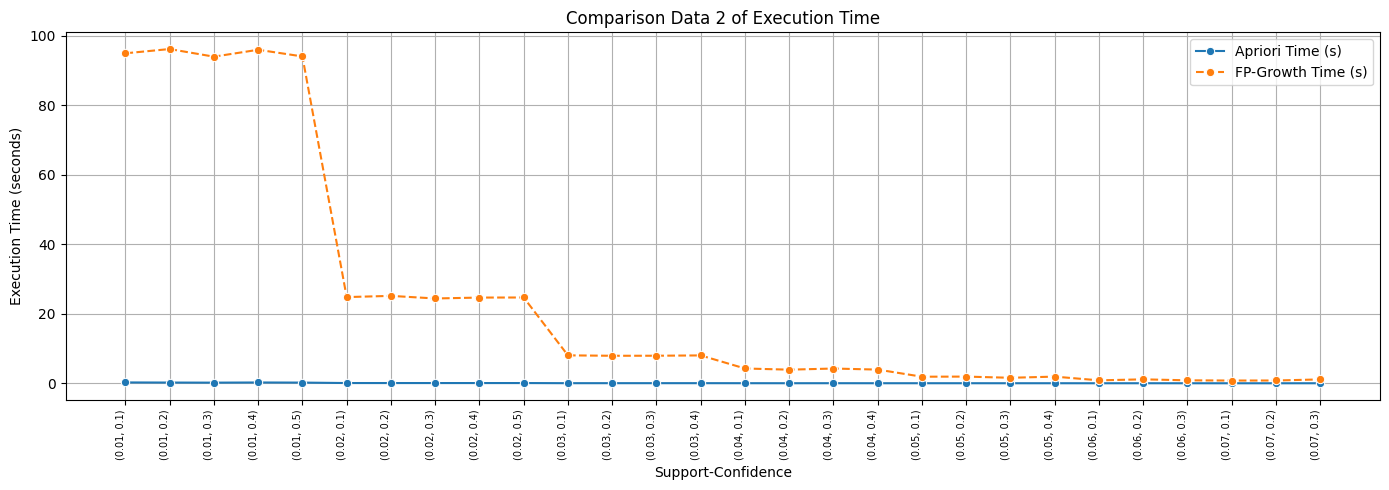

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Support-Confidence' not in comparison2_df_Rule_non_zero.columns:
    comparison2_df_Rule_non_zero['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison2_df_Rule_non_zero.iterrows()]


plt.figure(figsize=(14, 5))
sns.lineplot(
    data=comparison2_df_Rule_non_zero,
    x="Support-Confidence",
    y="Apriori Time (s)",
    marker='o',
    label="Apriori Time (s)",
    errorbar=('ci', False)
)
sns.lineplot(
    data=comparison2_df_Rule_non_zero,
    x="Support-Confidence",
    y="FP-Growth Time (s)",
    marker='o',
    label="FP-Growth Time (s)",
    linestyle= "--",
    errorbar=('ci', False)
)
plt.title("Comparison Data 2 of Execution Time")
plt.xlabel("Support-Confidence")
plt.ylabel("Execution Time (seconds)")
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

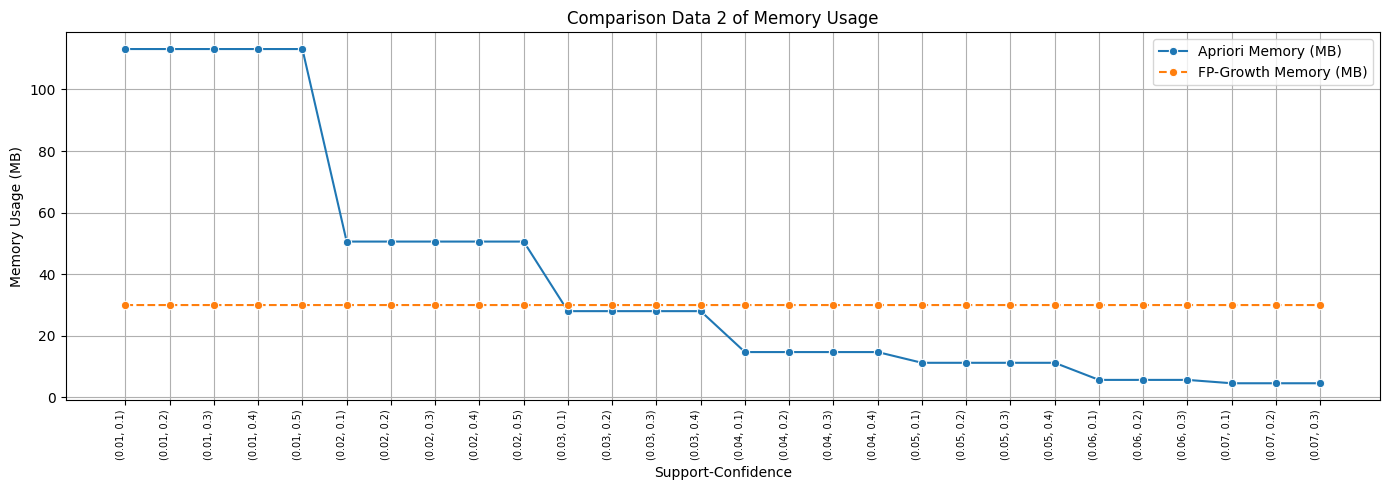

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
if 'Support-Confidence' not in comparison2_df_Rule_non_zero.columns:
    comparison2_df_Rule_non_zero['Support-Confidence'] = [f"({row['Min Support']}, {row['Confidence Threshold']})" for _, row in comparison2_df_Rule_non_zero.iterrows()]

plt.figure(figsize=(14, 5))
sns.lineplot(
    data=comparison2_df_Rule_non_zero,
    x="Support-Confidence",
    y="Apriori Memory (MB)",
    marker='o',
    label="Apriori Memory (MB)",
    errorbar=('ci', False)
)
sns.lineplot(
    data=comparison2_df_Rule_non_zero,
    x="Support-Confidence",
    y="FP-Growth Memory (MB)",
    marker='o',
    label="FP-Growth Memory (MB)",
    linestyle= "--",
    errorbar=('ci', False)
)
plt.title("Comparison Data 2 of Memory Usage")
plt.xlabel("Support-Confidence")
plt.ylabel("Memory Usage (MB)")
plt.xticks(rotation=90, ha='right', fontsize=7)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# **Check Rule Data 1**

> Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.3)
rules_sorted_apriori = rules_apriori.sort_values('support', ascending=False)
rulesortapriori = rules_sorted_apriori.reset_index(drop=True)
rulesortapriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,1.0,0.040365,1.207857,0.321413,0.343089,0.172088,0.511088
1,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,1.0,0.040365,1.192021,0.330310,0.343089,0.161088,0.511088
2,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,1.0,0.034662,1.162571,0.288629,0.332263,0.139837,0.498868
3,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,1.0,0.034662,1.170579,0.283728,0.332263,0.145722,0.498868
4,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,1.0,0.030499,1.139764,0.260247,0.322684,0.122625,0.488025
5,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,1.0,0.030499,1.147905,0.254963,0.322684,0.128848,0.488025
6,(chocolate),(Butter),0.421421,0.420420,0.202202,0.479810,1.141262,1.0,0.025028,1.114169,0.213933,0.316119,0.102470,0.480381
7,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,1.0,0.025028,1.114693,0.213564,0.316119,0.102892,0.480381
8,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,1.0,0.029246,1.140467,0.245323,0.321145,0.123167,0.486246
9,(chocolate),(Ice cream),0.421421,0.410410,0.202202,0.479810,1.169098,1.0,0.029246,1.133412,0.249991,0.321145,0.117708,0.486246


> FP-Growth

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.2, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.3)
rules_sorted_fpgrowth = rules_fpgrowth.sort_values('support', ascending=False)
rulesortfp = rules_sorted_fpgrowth.reset_index(drop=True)
rulesortfp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Milk),(chocolate),0.405405,0.421421,0.211211,0.520988,1.236263,1.0,0.040365,1.207857,0.321413,0.343089,0.172088,0.511088
1,(chocolate),(Milk),0.421421,0.405405,0.211211,0.501188,1.236263,1.0,0.040365,1.192021,0.330310,0.343089,0.161088,0.511088
2,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,1.0,0.034662,1.170579,0.283728,0.332263,0.145722,0.498868
3,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,1.0,0.034662,1.162571,0.288629,0.332263,0.139837,0.498868
4,(chocolate),(Ice cream),0.421421,0.410410,0.202202,0.479810,1.169098,1.0,0.029246,1.133412,0.249991,0.321145,0.117708,0.486246
5,(Ice cream),(chocolate),0.410410,0.421421,0.202202,0.492683,1.169098,1.0,0.029246,1.140467,0.245323,0.321145,0.123167,0.486246
6,(chocolate),(Butter),0.421421,0.420420,0.202202,0.479810,1.141262,1.0,0.025028,1.114169,0.213933,0.316119,0.102470,0.480381
7,(Butter),(chocolate),0.420420,0.421421,0.202202,0.480952,1.141262,1.0,0.025028,1.114693,0.213564,0.316119,0.102892,0.480381
8,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,1.0,0.030499,1.139764,0.260247,0.322684,0.122625,0.488025
9,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,1.0,0.030499,1.147905,0.254963,0.322684,0.128848,0.488025


> Check rules

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

rulesortapriori['rule'] = list(zip(rulesortapriori['antecedents'].apply(frozenset), rulesortapriori['consequents'].apply(frozenset)))
rulesortfp['rule'] = list(zip(rulesortfp['antecedents'].apply(frozenset), rulesortfp['consequents'].apply(frozenset)))

apriori_rules_set = set(rulesortapriori['rule'])
fpgrowth_rules_set = set(rulesortfp['rule'])

same_rules = apriori_rules_set & fpgrowth_rules_set
different_rules = (apriori_rules_set | fpgrowth_rules_set) - same_rules

same_df = pd.DataFrame(list(same_rules), columns=["antecedents", "consequents"])
same_df["rule"] = same_df.apply(lambda row: (row["antecedents"], row["consequents"]), axis=1)

same_df = same_df.merge(
    rulesortapriori[['rule', 'support', 'confidence']],
    on='rule',
    how='left',
    suffixes=('', '_apriori')
)

same_df = same_df.merge(
    rulesortfp[['rule', 'support', 'confidence']],
    on='rule',
    how='left',
    suffixes=('_apriori', '_fpgrowth')
)

notsame_df = pd.concat([
    rulesortapriori[rulesortapriori['rule'].isin(different_rules)],
    rulesortfp[rulesortfp['rule'].isin(different_rules)]
]).drop_duplicates().reset_index(drop=True)

print(f"same rule: {len(same_df)} ")
print(f"not the same rule: {len(notsame_df)}")

same_df

same rule: 12 
not the same rule: 0


,antecedents,consequents,rule,support_apriori,confidence_apriori,support_fpgrowth,confidence_fpgrowth
0,(Cheese),(Kidney Beans),"((Cheese), (Kidney Beans))",0.200200,0.495050,0.200200,0.495050
1,(Milk),(chocolate),"((Milk), (chocolate))",0.211211,0.520988,0.211211,0.520988
2,(Ice cream),(Butter),"((Ice cream), (Butter))",0.207207,0.504878,0.207207,0.504878
3,(Butter),(Ice cream),"((Butter), (Ice cream))",0.207207,0.492857,0.207207,0.492857
4,(Kidney Beans),(Cheese),"((Kidney Beans), (Cheese))",0.200200,0.490196,0.200200,0.490196
5,(Ice cream),(chocolate),"((Ice cream), (chocolate))",0.202202,0.492683,0.202202,0.492683
6,(Butter),(chocolate),"((Butter), (chocolate))",0.202202,0.480952,0.202202,0.480952
7,(chocolate),(Milk),"((chocolate), (Milk))",0.211211,0.501188,0.211211,0.501188
8,(chocolate),(Ice cream),"((chocolate), (Ice cream))",0.202202,0.479810,0.202202,0.479810
9,(Kidney Beans),(Butter),"((Kidney Beans), (Butter))",0.202202,0.495098,0.202202,0.495098


# **Check Rule DATA 2**



> Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets_apriori2 = apriori(df2, min_support=0.01, use_colnames=True)
rules_apriori2 = association_rules(frequent_itemsets_apriori2, metric="confidence", min_threshold=0.1)
rules_sorted_apriori2 = rules_apriori2.sort_values('support', ascending=False)
rulesortapriori2 = rules_sorted_apriori2.reset_index(drop=True)
rulesortapriori2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,(fruit/vegetable juice),(sausage),0.072293,0.093950,0.010066,0.139241,1.482068,1.0,0.003274,1.052617,0.350614,0.064453,0.049987,0.123192
456,(hard cheese),(whole milk),0.024504,0.255516,0.010066,0.410788,1.607682,1.0,0.003805,1.263526,0.387481,0.037288,0.208564,0.225092
457,(waffles),(other vegetables),0.038434,0.193493,0.010066,0.261905,1.353565,1.0,0.002629,1.092687,0.271651,0.045371,0.084825,0.156964
458,(sausage),(fruit/vegetable juice),0.093950,0.072293,0.010066,0.107143,1.482068,1.0,0.003274,1.039032,0.358995,0.064453,0.037566,0.123192


> FP-Growth

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fpgrowth2 = fpgrowth(df2, min_support=0.01, use_colnames=True)
rules_fpgrowth2 = association_rules(frequent_itemsets_fpgrowth2, metric="confidence", min_threshold=0.1)
rules_sorted_fpgrowth2 = rules_fpgrowth2.sort_values('support', ascending=False)
rulesortfp2 = rules_sorted_fpgrowth2.reset_index(drop=True)
rulesortfp2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.200000,0.176286,0.339817
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.200000,0.123228,0.339817
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,1.0,0.009636,1.048452,0.228543,0.147942,0.046213,0.264776
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,1.0,0.009636,1.075696,0.208496,0.147942,0.070369,0.264776
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,1.0,0.020379,1.244132,0.422732,0.165267,0.196226,0.310432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,"(curd, whole milk)",(yogurt),0.026131,0.139502,0.010066,0.385214,2.761356,1.0,0.006421,1.399671,0.654974,0.064706,0.285546,0.228686
456,(curd),(rolls/buns),0.053279,0.183935,0.010066,0.188931,1.027164,1.0,0.000266,1.006160,0.027934,0.044315,0.006123,0.121829
457,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,1.0,0.007081,1.154078,0.745217,0.101434,0.133507,0.184302
458,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,1.0,0.005649,1.782567,0.571107,0.038313,0.439011,0.310874


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

rulesortapriori2['rule'] = list(zip(rulesortapriori2['antecedents'].apply(frozenset), rulesortapriori2['consequents'].apply(frozenset)))
rulesortfp2['rule'] = list(zip(rulesortfp2['antecedents'].apply(frozenset), rulesortfp2['consequents'].apply(frozenset)))

apriori_rules_set = set(rulesortapriori2['rule'])
fpgrowth_rules_set = set(rulesortfp2['rule'])

same_rules2 = apriori_rules_set & fpgrowth_rules_set
different_rules2 = (apriori_rules_set | fpgrowth_rules_set) - same_rules2

same_df2 = pd.DataFrame(list(same_rules2), columns=["antecedents", "consequents"])
same_df2["rule"] = same_df2.apply(lambda row: (row["antecedents"], row["consequents"]), axis=1)

same_df2 = same_df2.merge(
    rulesortapriori2[['rule', 'support', 'confidence']],
    on='rule',
    how='left',
    suffixes=('', '_apriori')
)

same_df2 = same_df2.merge(
    rulesortfp2[['rule', 'support', 'confidence']],
    on='rule',
    how='left',
    suffixes=('_apriori', '_fpgrowth')
)

notsame_df2 = pd.concat([
    rulesortapriori2[rulesortapriori2['rule'].isin(different_rules2)],
    rulesortfp2[rulesortfp2['rule'].isin(different_rules2)]
]).drop_duplicates().reset_index(drop=True)

print(f"เหมือนกัน: {len(same_df2)} ")
print(f"ไม่เหมือนกัน: {len(notsame_df2)}")

same_df2

เหมือนกัน: 460 
ไม่เหมือนกัน: 0


,antecedents,consequents,rule,support_apriori,confidence_apriori,support_fpgrowth,confidence_fpgrowth
0,(other vegetables),(bottled water),"((other vegetables), (bottled water))",0.024809,0.128219,0.024809,0.128219
1,(pastry),(yogurt),"((pastry), (yogurt))",0.017692,0.198857,0.017692,0.198857
2,(root vegetables),(whole milk),"((root vegetables), (whole milk))",0.048907,0.448694,0.048907,0.448694
3,"(whipped/sour cream, other vegetables)",(whole milk),"((whipped/sour cream, other vegetables), (whol...",0.014642,0.507042,0.014642,0.507042
4,(beef),(other vegetables),"((beef), (other vegetables))",0.019725,0.375969,0.019725,0.375969
...,...,...,...,...,...,...,...
455,(ham),(whole milk),"((ham), (whole milk))",0.011490,0.441406,0.011490,0.441406
456,(citrus fruit),(yogurt),"((citrus fruit), (yogurt))",0.021657,0.261671,0.021657,0.261671
457,(other vegetables),(rolls/buns),"((other vegetables), (rolls/buns))",0.042603,0.220179,0.042603,0.220179
458,"(whole milk, other vegetables)",(pastry),"((whole milk, other vegetables), (pastry))",0.010574,0.141304,0.010574,0.141304
